Scraping data from Yahoo Finance

In [1]:
# Import dependencies
import yfinance as yf

In [2]:
# Retrieving Tesla stock data from 2016-01-01 to 2021-02-09
TSLA_data = yf.download("TSLA","2016-01-01","2021-02-09")

[*********************100%***********************]  1 of 1 completed


In [3]:
# Check formatting
TSLA_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
TSLA_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,47.702000,48.689999,47.674000,48.001999,48.001999,13575000
2016-01-04,46.144001,46.276001,43.799999,44.681999,44.681999,34135500
2016-01-05,45.271999,45.377998,44.000000,44.686001,44.686001,15934000
2016-01-06,44.000000,44.009998,43.195999,43.807999,43.807999,18895500
2016-01-07,42.838001,43.688000,42.734001,43.130001,43.130001,17771500
...,...,...,...,...,...,...
2021-02-01,814.289978,842.000000,795.559998,839.809998,839.809998,25391400
2021-02-02,844.679993,880.500000,842.200012,872.789978,872.789978,24346200
2021-02-03,877.020020,878.080017,853.059998,854.690002,854.690002,18343500


In [5]:
TSLA_data = TSLA_data.reset_index()

In [6]:
TSLA_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-31,47.702000,48.689999,47.674000,48.001999,48.001999,13575000
1,2016-01-04,46.144001,46.276001,43.799999,44.681999,44.681999,34135500
2,2016-01-05,45.271999,45.377998,44.000000,44.686001,44.686001,15934000
3,2016-01-06,44.000000,44.009998,43.195999,43.807999,43.807999,18895500
4,2016-01-07,42.838001,43.688000,42.734001,43.130001,43.130001,17771500
...,...,...,...,...,...,...,...
1279,2021-02-01,814.289978,842.000000,795.559998,839.809998,839.809998,25391400
1280,2021-02-02,844.679993,880.500000,842.200012,872.789978,872.789978,24346200
1281,2021-02-03,877.020020,878.080017,853.059998,854.690002,854.690002,18343500
1282,2021-02-04,855.000000,856.500000,833.419983,849.989990,849.989990,15812700


In [7]:
TSLA_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
# Retrieving Microsoft stock data from 2016-01-01 to 2021-02-09
MSFT_data = yf.download("MSFT","2016-01-01","2021-02-09")

[*********************100%***********************]  1 of 1 completed


In [9]:
MSFT_data = MSFT_data.reset_index()

In [10]:
GME_data = yf.download("GME","2016-01-01","2021-02-09")

[*********************100%***********************]  1 of 1 completed


In [11]:
# Retrieving GameStop stock data from 2016-01-01 to 2021-02-09
GME_data = GME_data.reset_index()

In [12]:
TSLA_data.to_csv("../data/TSLA_stock.csv",index=False)
MSFT_data.to_csv("../data/MSFT_stock.csv",index=False)
GME_data.to_csv("../data/GME_stock.csv",index=False)

Load dataframes into SQLite Database

In [13]:
# SQL Alchemy
from sqlalchemy import create_engine
database_path = "../sqlite_db/stock_market_sqlite.db"

In [14]:
# Create Engine
engine = create_engine(f"sqlite:///{database_path}")

In [15]:
# Add TSLA, MSFT and GME stock market data to TSLA table
TSLA_data.to_sql('TSLA',con=engine,if_exists='replace')
MSFT_data.to_sql('MSFT',con=engine,if_exists='replace')
GME_data.to_sql('GME',con=engine,if_exists='replace')

In [16]:
# Check if data is loaded
engine.execute("SELECT * FROM TSLA").fetchall()

[(0, '2015-12-31 00:00:00.000000', 47.70199966430664, 48.689998626708984, 47.67399978637695, 48.00199890136719, 48.00199890136719, 13575000),
 (1, '2016-01-04 00:00:00.000000', 46.14400100708008, 46.2760009765625, 43.79999923706055, 44.68199920654297, 44.68199920654297, 34135500),
 (2, '2016-01-05 00:00:00.000000', 45.27199935913086, 45.37799835205078, 44.0, 44.68600082397461, 44.68600082397461, 15934000),
 (3, '2016-01-06 00:00:00.000000', 44.0, 44.0099983215332, 43.19599914550781, 43.80799865722656, 43.80799865722656, 18895500),
 (4, '2016-01-07 00:00:00.000000', 42.8380012512207, 43.6879997253418, 42.73400115966797, 43.130001068115234, 43.130001068115234, 17771500),
 (5, '2016-01-08 00:00:00.000000', 43.571998596191406, 44.0880012512207, 42.15399932861328, 42.20000076293945, 42.20000076293945, 18140500),
 (6, '2016-01-11 00:00:00.000000', 42.801998138427734, 42.88999938964844, 40.599998474121094, 41.56999969482422, 41.56999969482422, 20457000),
 (7, '2016-01-12 00:00:00.000000', 42.

In [17]:
engine.execute("SELECT * FROM MSFT").fetchall()

[(0, '2015-12-31 00:00:00.000000', 56.040000915527344, 56.189998626708984, 55.41999816894531, 55.47999954223633, 50.62727355957031, 27334100),
 (1, '2016-01-04 00:00:00.000000', 54.31999969482422, 54.79999923706055, 53.38999938964844, 54.79999923706055, 50.006744384765625, 53778000),
 (2, '2016-01-05 00:00:00.000000', 54.93000030517578, 55.38999938964844, 54.540000915527344, 55.04999923706055, 50.23487854003906, 34079700),
 (3, '2016-01-06 00:00:00.000000', 54.31999969482422, 54.400001525878906, 53.63999938964844, 54.04999923706055, 49.32234573364258, 39518900),
 (4, '2016-01-07 00:00:00.000000', 52.70000076293945, 53.4900016784668, 52.06999969482422, 52.16999816894531, 47.606788635253906, 56564900),
 (5, '2016-01-08 00:00:00.000000', 52.369998931884766, 53.279998779296875, 52.150001525878906, 52.33000183105469, 47.75279235839844, 48754000),
 (6, '2016-01-11 00:00:00.000000', 52.5099983215332, 52.849998474121094, 51.459999084472656, 52.29999923706055, 47.72541046142578, 36943800),
 (7,

In [18]:
engine.execute("SELECT * FROM GME").fetchall()

[(0, '2015-12-31 00:00:00.000000', 28.43000030517578, 28.860000610351562, 28.030000686645508, 28.040000915527344, 21.640424728393555, 1696000),
 (1, '2016-01-04 00:00:00.000000', 27.040000915527344, 28.459999084472656, 27.010000228881836, 28.309999465942383, 21.848804473876953, 4330400),
 (2, '2016-01-05 00:00:00.000000', 28.59000015258789, 29.010000228881836, 28.059999465942383, 28.770000457763672, 22.20381736755371, 3416600),
 (3, '2016-01-06 00:00:00.000000', 28.229999542236328, 28.739999771118164, 27.440000534057617, 28.3700008392334, 21.89510726928711, 3756400),
 (4, '2016-01-07 00:00:00.000000', 28.1200008392334, 28.770000457763672, 27.739999771118164, 28.450000762939453, 21.956851959228516, 2662800),
 (5, '2016-01-08 00:00:00.000000', 28.700000762939453, 28.790000915527344, 28.040000915527344, 28.3700008392334, 21.89510726928711, 2699200),
 (6, '2016-01-11 00:00:00.000000', 28.329999923706055, 29.549999237060547, 27.989999771118164, 29.3799991607666, 22.67459487915039, 3256700),

In [18]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from pandas import datetime

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [19]:
tsla_data = pd.read_csv("../data/TSLA_stock.csv",parse_dates = ["Date"], index_col = ["Date"])
msft_data = pd.read_csv("../data/MSFT_stock.csv")
gme_data = pd.read_csv("../data/GME_stock.csv")

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

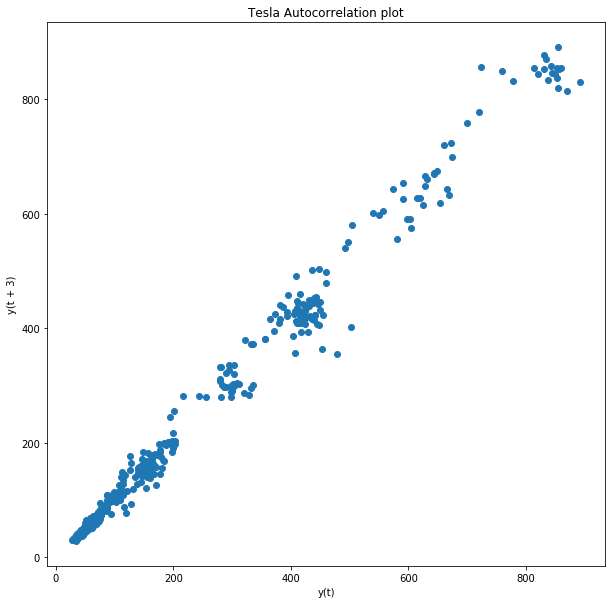

In [20]:
plt.figure(figsize=(10,10))
lag_plot(tsla_data["Open"],lag=3)
plt.title("Tesla Autocorrelation plot")

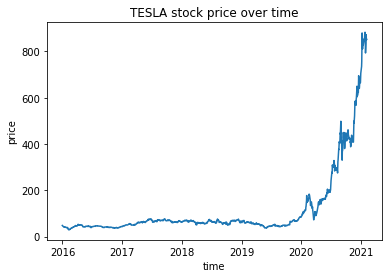

In [21]:
plt.plot(tsla_data["Close"])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [22]:
train_data, test_data = tsla_data[0:int(len(tsla_data)*0.7)], tsla_data[int(len(tsla_data)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 246.92605287729324


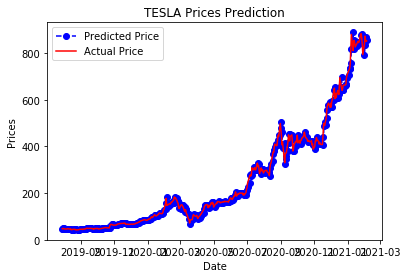

In [23]:
test_set_range = tsla_data[int(len(tsla_data)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

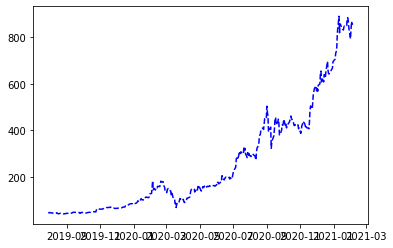

In [25]:
plt.plot(test_set_range, model_predictions, color='blue', linestyle='dashed',label='Predicted Price')

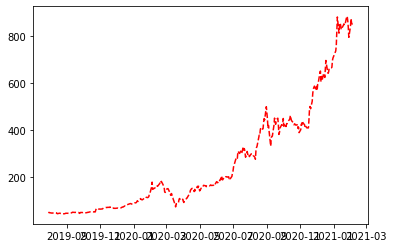

In [27]:
plt.plot(test_set_range, test_data, color='red',linestyle='dashed', label='Actual Price')

In [28]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import os
from flask import Flask, jsonify
from flask import Flask, render_template

In [33]:
datadatabase_path = "./sqlite_db/stock_market_sqlite.db"
engine = create_engine(f"sqlite:///{database_path}")

In [34]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [35]:
Base.classes.keys()

[]